# Unraveling Patterns with k-Nearest Neighbors: Understanding, Optimizing, and Evaluating on the Iris Dataset

In this data analysis project, I began by inspecting the Iris flower dataset, loading it from sklearn.datasets, and dividing it into input features (X) and labels (y). I then created a pandas DataFrame to provide a detailed statistical overview of key features like sepal length, sepal width, petal length, and petal width, shedding light on data completeness, central tendencies, and variability. Additionally, I visually explored feature relationships using pairplots and correlation matrices, unveiling positive and negative correlations among different attributes.

Moving on to the k-Nearest Neighbors (k-NN) algorithm, I constructed a line chart to elucidate the correlation between the number of neighbors (k) and the accuracy of the k-NN classifier. Through this, I identified the optimal k value (k=4) using the elbow method, and subsequently trained and evaluated the k-NN model on the Iris dataset. Simultaneously, I applied the K-Means clustering algorithm to a separate dataset, discerning the optimal number of clusters (k=4) through distortion analysis.

For model evaluation, I generated a comprehensive classification report for the k-NN model with k=4, highlighting its strong performance with high precision, recall, and F1-scores across all iris flower classes. The overall accuracy of 96% underscored the proficiency of the model in classifying iris flowers. To enhance understanding, I provided detailed explanations of key performance metrics, including accuracy, precision, and recall, emphasizing their significance in different contexts.

In the final section, I introduced the concept of k-fold cross-validation as a valuable approach for rigorously assessing model performance. I explained how this technique systematically partitions the dataset, iteratively trains and tests the model, and aggregates performance metrics, ensuring a robust evaluation. This project, encompassing data exploration, model development, evaluation, and detailed explanations, reflects my comprehensive exploration of the k-Nearest Neighbors algorithm on the Iris dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#load the data from sklearn.datasets
data     = load_iris()

#divide the data into the input 'X' and the labels 'y'
X        = data['data'] #the observations
y        = data['target'] #the label


In [3]:
#load the data in a pandas dataframe
df          = pd.DataFrame(X, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
df['class'] = [data['target_names'][idx] for idx in y]
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In the provided code, a statistical summary of the Iris flower dataset's key features, including 'sepal length,' 'sepal width,' 'petal length,' and 'petal width,' is generated using the describe() function. 

The statistical summary indicates that the dataset is complete, with 150 non-null data points for all features. The "mean" values reveal the averages: sepal length (5.84), sepal width (3.06), petal length (3.76), and petal width (1.20).

The "std" (standard deviation) measures data spread, e.g., sepal length has a standard deviation of approximately 0.83. "min" denotes the smallest observed values, such as sepal length (4.30) and petal width (0.10).

Percentiles, including the 25th, 50th, and 75th percentiles, offer insights into data distribution. For instance, the 25th percentile for sepal length is 5.10. In the "max" column, you find the largest values, like sepal length (7.90) and petal width (2.50). This summary provides a comprehensive view of dataset completeness, central tendencies, and variability.

In summary, this statistical overview provides a concise yet informative snapshot of the Iris flower dataset. It sheds light on data integrity, central tendencies, and the variability of sepal and petal features within the iris flowers. It aids in grasping the range and characteristics of these attributes in the dataset.

In [4]:
flower_summary = df[['sepal length', 'sepal width', 'petal length', 'petal width']].describe().round(2)
print(flower_summary)


       sepal length  sepal width  petal length  petal width
count        150.00       150.00        150.00       150.00
mean           5.84         3.06          3.76         1.20
std            0.83         0.44          1.77         0.76
min            4.30         2.00          1.00         0.10
25%            5.10         2.80          1.60         0.30
50%            5.80         3.00          4.35         1.30
75%            6.40         3.30          5.10         1.80
max            7.90         4.40          6.90         2.50


The pairplot provides a comprehensive perspective on data distribution and pairwise feature relationships. Within this visualization, we observe distinct correlation patterns.

When it comes down to positive correlations, features such as "sepal length" and "petal length," as well as "sepal length" and "petal width," exhibit positive correlations. This implies that as one feature increases, the other tends to rise as well. These positive correlations are visually apparent in the upward-sloping trends of the scatterplots. Conversely, negative correlations are evident between "sepal width" and "petal length," as well as "sepal width" and "petal width." In these cases, as one feature's value increases, the other tends to decrease, illustrated by the downward-sloping patterns in the scatterplots. Lastly, when it comes down to Weak or No Correlation, the pairplot reveals a lack of strong correlation between "sepal length" and "sepal width." The scatterplot for these features does not display a discernible pattern or trend. This observation aligns with the correlation matrix's report of a correlation coefficient close to zero for this feature pair.

The correlation matrix complements the visual insights gained from the pairplot by providing quantitative measures of the relationships between features in the Iris dataset. These numerical correlation coefficients offer a clear representation of the strength and direction of these associations. A correlation coefficient near 1 signifies a strong positive correlation, implying that as one feature increases, the other tends to increase linearly. Conversely, a coefficient near -1 indicates a strong negative correlation, where an increase in one feature corresponds to a decrease in the other. In this dataset, "petal length" and "petal width" exhibit a strong positive correlation with a coefficient of approximately 0.96, which aligns with our visual observation of their close relationship. In contrast, values near 0 imply a weak or no correlation. For instance, the correlation coefficient close to 0 between "sepal length" and "sepal width" indicates their very weak correlation, consistent with the absence of a discernible pattern in their scatterplot within the pairplot visualization. This quantitative approach enhances our understanding of feature relationships, providing a more comprehensive view of the data.

/Users/zelengungor/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


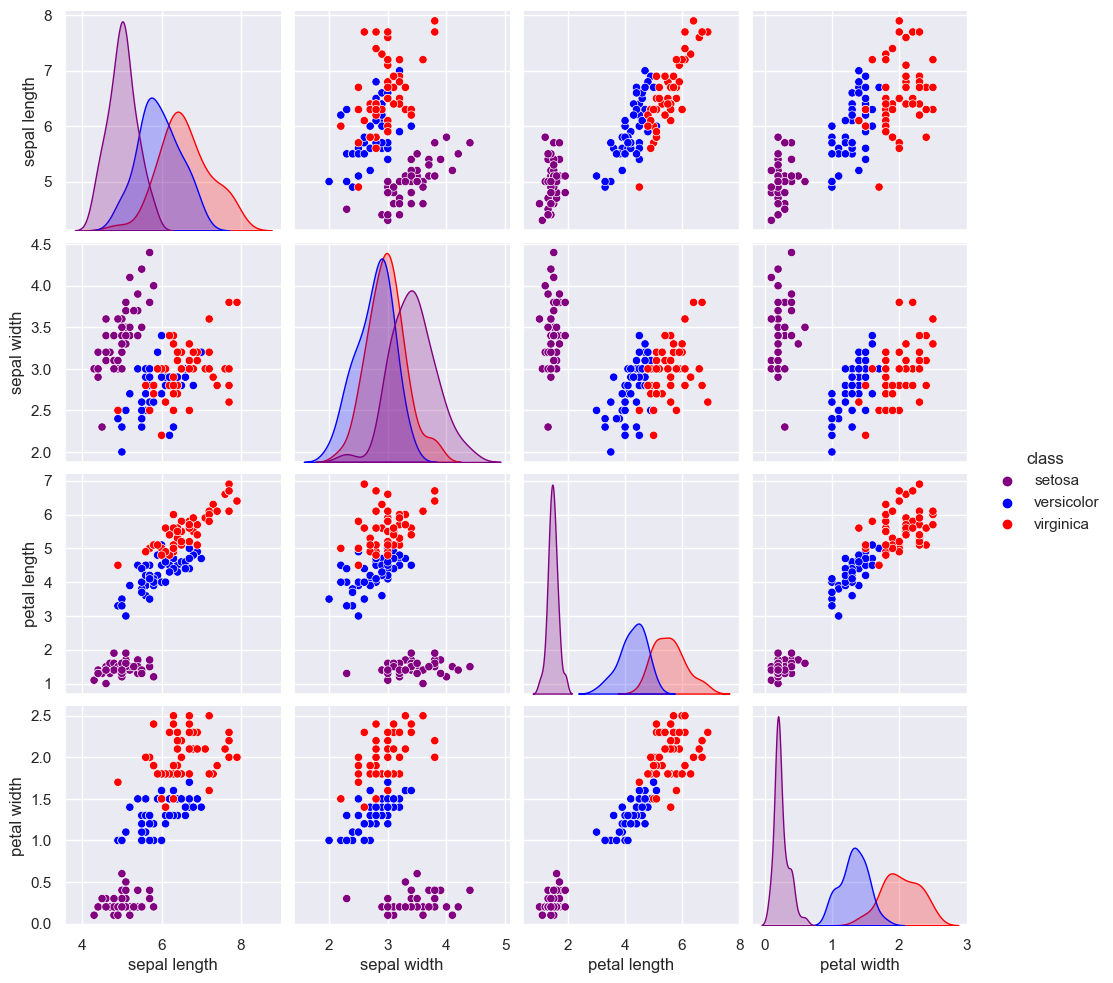

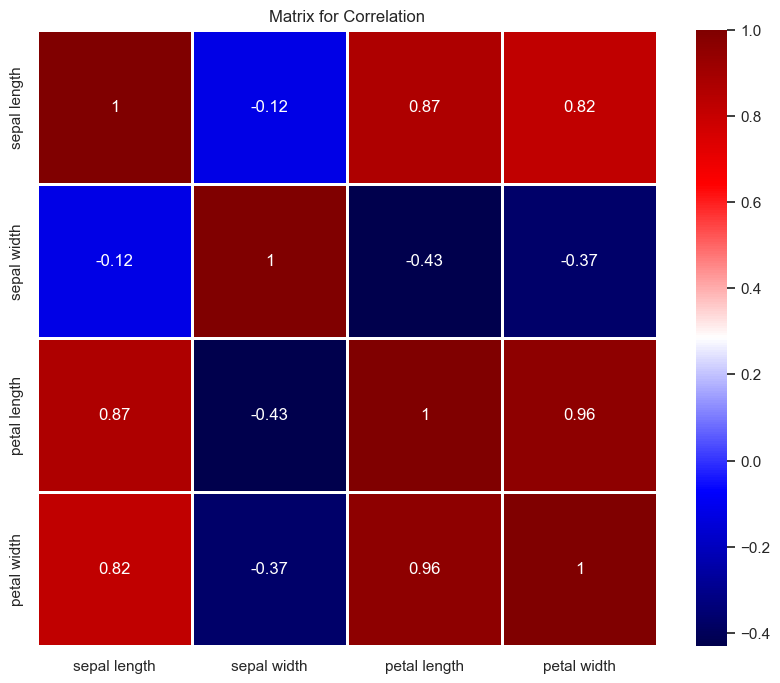

In [5]:
my_palette = sns.color_palette(["purple", "blue", "red"])

sns.pairplot(df, hue='class', palette=my_palette)
plt.show()

matrix_correlation = df.drop(columns=['class']).corr()

matrix_correlation = matrix_correlation.round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(matrix_correlation, annot=True, cmap='seismic', linewidths=0.9)
plt.title('Matrix for Correlation')
plt.show()


The line chart in this code is plotting the relationship between the number of neighbors (k) and the accuracy of the k-Nearest Neighbors (k-NN) classifier on the Iris dataset.

The x-axis of the chart represents different values of k, ranging from 1 to 20. These values determine how many nearest neighbors are considered when making predictions using the k-NN algorithm.

The y-axis of the chart represents the accuracy of the k-NN classifier when applied to the test data. Accuracy is a measure of how many of the test samples are correctly classified.

- For each value of k, a k-NN classifier is trained on the training data and then used to make predictions on the test data. The accuracy of these predictions is calculated. The accuracy values for each k are stored in the accuracy_scores list.
- The line chart is created using Matplotlib (plt) with plt.plot(k_values, accuracy_scores, marker='*', linestyle='-'). It plots the k_values on the x-axis and the corresponding accuracy scores on the y-axis.
- The line connects the points representing each value of k, making it easier to visualize how accuracy changes as k varies. The markers (in this case, '*') are added to each point on the line for better visibility.

All in all, the chart helps in understanding how the choice of the number of neighbors affects the performance of the k-NN classifier. By examining the chart, it can be determinde the best value of k that results in the highest accuracy for the given dataset. In this case, the chart shows that the accuracy remains high and constant for a range of k values(1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 14, 15), indicating that any of these k values would yield a high accuracy of 0.96.

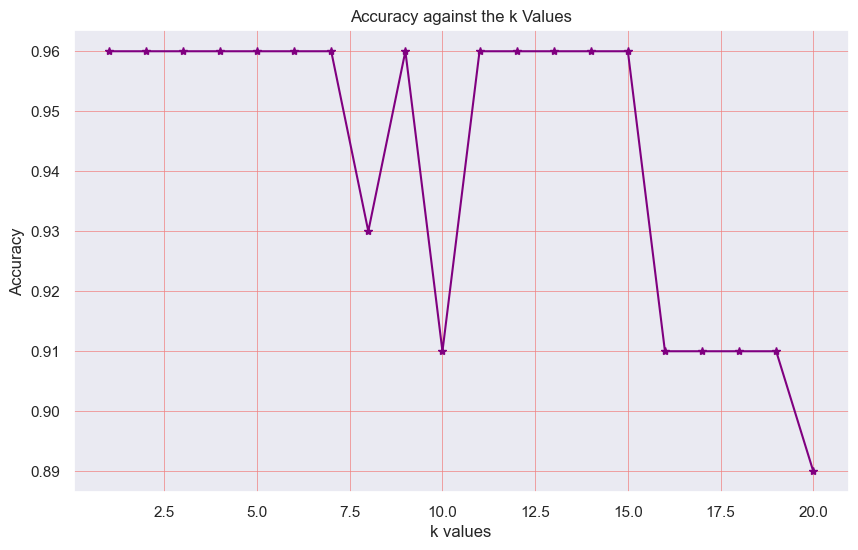

The best value(s) of k with the highest accuracy:
k=1: Accuracy=0.96
k=2: Accuracy=0.96
k=3: Accuracy=0.96
k=4: Accuracy=0.96
k=5: Accuracy=0.96
k=6: Accuracy=0.96
k=7: Accuracy=0.96
k=9: Accuracy=0.96
k=11: Accuracy=0.96
k=12: Accuracy=0.96
k=13: Accuracy=0.96
k=14: Accuracy=0.96
k=15: Accuracy=0.96


In [6]:
X = data['data']
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=7, 
                                                    stratify=y)

k = 5  

knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred), 2)

k_values = list(range(1, 21))
scores_for_accuracy = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = round(accuracy_score(y_test, y_pred), 2)
    scores_for_accuracy.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, scores_for_accuracy, marker='*', linestyle='-', color='purple')
plt.title('Accuracy against the k Values')
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.grid(True, color='lightcoral', linewidth=0.5)
plt.show()

max_accuracy = max(scores_for_accuracy)
best_k_values = [k for k, accuracy in zip(k_values, scores_for_accuracy) if accuracy == max_accuracy]

print("The best value(s) of k with the highest accuracy:")
for best_k in best_k_values:
    print(f"k={best_k}: Accuracy={max_accuracy:.2f}")



The output represents the distortion values for different values of k when applying the K-Means clustering algorithm to the dataset. The distortion is a measure of how closely related the data points within a cluster are. Lower distortion values indicate that the data points are closer to the centroid of their respective clusters.

- K=1: High distortion (2.93) with a single cluster, leading to significant distances from centroids.
- K=2: Distortion decreases (1.12) as two clusters form, reducing data-to-centroid distances.
- K=4: Lower distortion (0.18) with four clusters, offering a better fit to the data.
- K=9: Significant distortion drop (0.04) with nine clusters, suggesting more meaningful divisions.
- K=11-15: Zero distortion indicates overfitting with unique clusters per data point.

Smaller K Values (K=1):
Distortion: The distortion will be relatively high when K is small. In this case, all data points are considered a single cluster, and the distances from each data point to the centroid are relatively large.
Downsides: Using K=1 can lead to oversimplification. It treats the entire dataset as a single cluster, which may not effectively capture underlying patterns or distinctions within the data. This results in a lack of granularity, and it may not adequately represent complex data structures.

Larger K Values (K=15):
Distortion: When K is significantly larger, the distortion continues to decrease, but at a slower rate. Each cluster becomes smaller and more granular.
Downsides: Using a larger K value can lead to over-segmentation or overfitting. Each cluster becomes too specific, capturing noise and minor variations in the data. This results in a model that might not generalize well to unseen data. Moreover, the computational complexity and resource requirements increase with a higher K value.

Optimal K Value (K=4):
Distortion: At the optimal K value (the "elbow" point), the distortion sharply decreases, indicating that the data points are effectively grouped into clusters with relatively small distances between the data points and their respective cluster centroids.
- Benefits: This value of K provides a good balance between model complexity and data fit. It captures the underlying patterns in the data without overcomplicating the model. It's generally a reliable choice for most practical applications.

To summarize, when the distortion values for different K values are visualized, the graph forms an elbow shape. The point at which the distortion starts to decrease in a linear fashion is typically considered the optimal K value, as it signifies a good balance between model complexity and data fit. The optimal K value seems to be 4 since the distortion sharply decreases beyond this point, and the graph starts to look like a straight line. Therefore, K=4 is the best number of clusters for the dataset.

k=1: Distortion=2.93
k=2: Distortion=1.12
k=3: Distortion=0.40


/Users/zelengungor/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zelengungor/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zelengungor/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zelengungor/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

k=4: Distortion=0.18
k=5: Distortion=0.18
k=6: Distortion=0.14
k=7: Distortion=0.11
k=9: Distortion=0.07
k=11: Distortion=0.00
k=12: Distortion=0.00
k=13: Distortion=0.00
k=14: Distortion=0.00


/Users/zelengungor/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zelengungor/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zelengungor/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zelengungor/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

k=15: Distortion=0.00


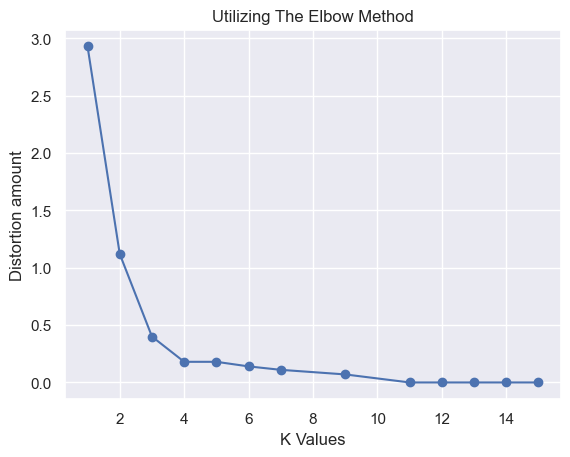

In [7]:
from sklearn.cluster import KMeans
import numpy as np

x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8, 4, 4, 5, 4])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3, 9, 10, 9, 10])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

k_values = [1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 14, 15]

distortions = []
for k in k_values:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    distortion = sum(np.min(np.square(X - kmeanModel.cluster_centers_[kmeanModel.labels_]), axis=1)) / X.shape[0]
    distortions.append(round(distortion, 2))  
    print(f'k={k}: Distortion={distortions[-1]:.2f}')

plt.plot(k_values, distortions, 'bo-')
plt.xlabel('K Values')
plt.ylabel('Distortion amount')
plt.title('Utilizing The Elbow Method')
plt.grid(True)
plt.show()


The classification report corresponds to a K-nearest neighbors (KNN) model with a recommended value of k=4. This model demonstrates strong performance across precision, recall, and F1-scores for all three iris flower classes ('setosa,' 'versicolor,' and 'virginica'). The precision values indicate that the model's positive predictions are highly accurate, while recall is high for all three classes (0.93 or 1.00). This further suggests that the model effectively captures most of the actual instances of each class.

Additionally, the F1-scores, representing a balance between precision and recall, are consistently high (0.93 or 1.00), indicating a good balance between precision and recall. The overall accuracy of the model is 96%, showcasing its proficiency in classifying iris flowers. With macro and weighted averages also at 96%, the KNN model with k=4 demonstrates exceptional accuracy and effectiveness in classifying iris flowers. It excels in precision, recall, and F1-scores for all classes, showcasing its precise discrimination of iris species. This model is a well-suited choice for this classification task, underlining its reliability and robust performance.

In [8]:
from sklearn.metrics import classification_report

k_value_best = 4  

knn = KNeighborsClassifier(n_neighbors=k_value_best)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

report = classification_report(y_test, y_pred, target_names=data['target_names'])
print("Classification Report for k =", k_value_best)
print(report)


Classification Report for k = 4
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.93      0.93      0.93        15
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



Accuracy: It is a performance metric that assesses the overall correctness of a model's predictions. It is calculated as the ratio of correctly predicted instances to the total instances in the dataset. When all classes are of equal importance and carry similar consequences, it is a reasonable metric to use. For instance, consider a weather forecasting model. It predicts whether it will rain on a given day. In this case, accuracy is a suitable metric. It measures how often the model's predictions are correct, regardless of whether it predicts rain or no rain.The consequences of both false positives and false negatives are similar and have relatively balanced implications. 

Precision: Precision evaluates the precision of positive predictions by calculating the ratio of true positives to all positive predictions, including both correct and incorrect ones. It's valuable when the consequences of false positives are significant. Imagine a scenario where you're building a system to detect credit card fraud. In this case, precision becomes crucial. High precision means that when the system flags a transaction as potentially fraudulent, it's highly likely to be correct, minimizing the chances of falsely accusing legitimate cardholders of fraud.

Recall: Also known as Sensitivity or True Positive Rate, recall assesses a model's ability to capture all the relevant instances in the dataset. It is calculated as the ratio of true positives to all actual positive cases which is: true positives + false negatives. Recall becomes crucial when the consequences of missing positive instances are severe. An example where high recall is important is in a medical test for a life-threatening disease, such as cancer. In this case, you want the test to have high recall because missing a true positive can have dire consequences. High recall ensures that as many individuals with the disease are correctly identified as possible, even if it means some false alarms. The focus here is on early and accurate detection, which prioritizes patient health and safety over precision.

In addition to the train-test split method, another valuable approach for evaluating and fine-tuning machine learning models is k-fold cross-validation. Cross-validation is a technique used to rigorously assess a model's performance by systematically partitioning the dataset into multiple subsets or "folds" and iteratively training and testing the model.

The k-fold cross-validation process involves the initial step of dividing the dataset into k equally sized subsets, where k is often chosen as a standard value like 5 or 10. During each iteration, the model is trained on k-1 of these folds, which collectively form the training set. The remaining fold serves as the validation or test set for that particular round. This procedure is reiterated k times, with each fold being designated as the validation set once. Subsequently, the performance metrics, including accuracy and error rates, are computed by aggregating the outcomes of these iterations. This thorough approach offers a robust evaluation of the model's capabilities.

K-fold cross-validation proves to be particularly beneficial when confronted with limited datasets. This method optimizes the use of the available data points by repeatedly training and validating the model on different subsets. By doing so, it guarantees that the model's performance remains stable and is not swayed by the randomness of a single data split. Consequently, K-fold cross-validation emerges as a resilient and dependable technique for thoroughly evaluating and choosing models.